In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [238]:
df = pd.read_csv('mall customers.csv')

In [239]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [240]:
df = df.drop('CustomerID',axis=1)

In [241]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [242]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [243]:
df.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [244]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [245]:
df2 = df.copy()

In [246]:
df.nunique()

Gender     2
Age       51
income    64
score     84
dtype: int64

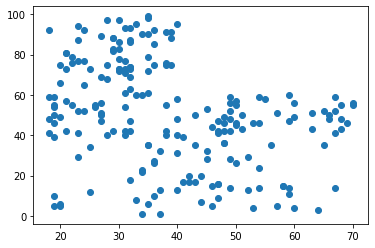

In [247]:
plt.scatter(df.Age , df.score)

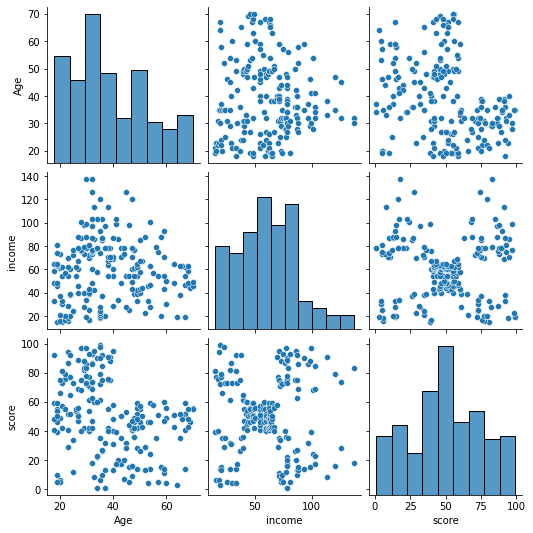

In [248]:
sns.pairplot(df[['Age','income','score']])

# implementing DBSCAN Cluster that dataset

In [249]:
from sklearn.cluster import DBSCAN    
dbscan = DBSCAN(eps=5,min_samples=5)

In [250]:
df = df.iloc[:,[2,3]].values

In [251]:
labels = dbscan.fit_predict(df)

In [252]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

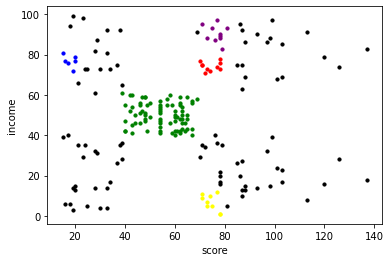

In [253]:

plt.scatter(df[labels==-1,0], df[labels==-1,1], s= 10, color='black')


plt.scatter(df[labels==0,0], df[labels==0,1], s= 10, color='blue')
plt.scatter(df[labels==1,0], df[labels==1,1], s= 10, color='green')
plt.scatter(df[labels==2,0], df[labels==2,1], s= 10, color='red')
plt.scatter(df[labels==3,0], df[labels==3,1], s= 10, color='yellow')
plt.scatter(df[labels==4,0], df[labels==4,1], s= 10, color='purple')


plt.xlabel('score')
plt.ylabel('income')
plt.show()


# Another method

In [255]:
model = dbscan.fit(df2[['income','score']])
labels = model.labels_


In [256]:
df2.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [260]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [258]:
from sklearn import metrics

sample_cores = np.zeros_like(labels, dtype = bool )

In [259]:
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [261]:
sample_cores[dbscan.core_sample_indices_]= True
sample_cores

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,

In [262]:
n_clusters = len(set(labels))-(1 if -1 in labels else 0) # calculating the number of cluster

In [263]:
n_clusters

5

In [265]:
 np.unique(n_clusters)

array([5])